Лабораторная работа №6
Любченко Мирославы

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

In [28]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
table1=[]
table1 = [9.6, 8.1, 8.8,7.9,9.2,8.0,8.4,10.1,7.8,8.1]
table2=[]
table2 = [5.7, 4.2, 6.4,5.5,5.3,4.2,5.1,5.9,7.5,5.0]
df = pd.DataFrame({
    'до приема препарата': table1,
    'после приема препарата': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Уровень глюкозы в крови, ммоль/л'
df.index.name = '№ пациента'
df

"Уровень глюкозы в крови, ммоль/л",до приема препарата,после приема препарата
№ пациента,,
1,9.6,5.7
2,8.1,4.2
3,8.8,6.4
4,7.9,5.5
5,9.2,5.3
6,8.0,4.2
7,8.4,5.1
8,10.1,5.9
9,7.8,7.5


2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

[]

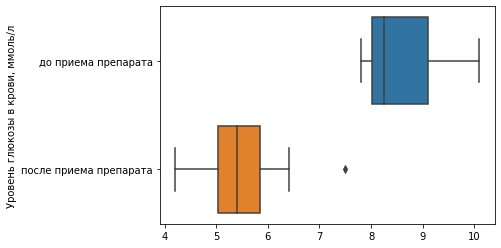

In [61]:
sns.boxplot(data=df, orient='h').set()

3. Написати функції:

для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

In [62]:
def mas(massiv,n):
    sum1= 0
    for i in range(n):
        sum1+=((massiv[i])**2)
    return sum1
def Pearson(x, y):
    n = len(x)
    sum1=sum(x)
    sum2=sum(y)
    d=sum1*sum2
    k=0
    for i in range(n):
        k+=x[i]*y[i]
    sum3=mas(x,n)
    sum4=(sum(x))**2
    sum5=mas(y,n)
    sum6=((sum(y))**2)
    result=0
    r = ((n * k)-d)/(math.sqrt((n*sum3-sum4)*(n*sum5-sum6)))
    print('Отримане значення коефіцієнту кореляції Пірсона: r = ' + str(r))
    df= len(x)-2
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("Таблица критических значений коэфициента корреляции Пирсона.xlsx").iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту кореляції = " + str(table))
    if table<r:
        result = "Оскільки значення коефіцієнту кореляції Пірсона більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення коефіцієнту кореляції Пірсона менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result

In [79]:
def Student(x, y):
    n=len(x)
    d=[]*n
    for i in range(n):
        d.append(x[i] - y[i])
    M=sum(d)/n
    L=0
    for i in range(n):
        L += ((M-d[i])**2)
    sigma = math.sqrt((L)/(n-1))
    t = M/(sigma/math.sqrt(n))
    print('Отримане значення t-критерію Стьюдента: t = ' + str(t))
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("Таблица критических значений для парного критерия.xlsx").iloc[df-1, 1 ]
    print("Критичне значення коефіцієнту Стьюдента = " + str(table))
    if table<t:
        result = "Оскільки значення коефіцієнту Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення коефіцієнту Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result  

4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

In [64]:
Pearson(table1, table2)

Значення коефіцієнту кореляції Пірсона: r = 0.14397866762845465
Значення ступеня свободи: df = 8
Критичне значення коефіцієнту кореляції = 0.6319


"Оскільки значення коефіцієнту кореляції Пірсона менше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"

In [81]:
Student(table1,table2)

Отримане значення t-критерію Стьюдента: t = 8.379887064504546
Значення ступеня свободи: df = 9
Критичне значення коефіцієнту Стьюдента = 2.262


"Оскільки значення коефіцієнту Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

    Висновок: 
    в результаті аналізу данних рівня глюкози у крові до та після прийому препарату виявлено:
 1) Відсутність статистичної залежності;
 
 2) Так як отримане значення критерію Стьюдента більше критичного, робимо висновок про наявність статистично значущих відмінностей вмісту глюкози в крові до та після прийому нового препарату. Була прийнята альтернативна гіпотеза про відмінність середніх.